In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns=['Unnamed: 0'],axis='columns',inplace=True)

In [7]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
774,HP,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.26kg,66280.3200
240,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,128GB SSD,Intel HD Graphics 520,Windows 10,2.2kg,31381.9200
180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02kg,55890.7200
904,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,104588.1072
796,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.63kg,15930.7200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [9]:
## converting ram and inches to int

df['Ram'] = df['Ram'].str.replace("GB","")
df['Weight'] = df['Weight'].str.replace("kg",'')

In [10]:
df['Ram'] = df['Ram'].astype('Int64')
df['Weight'] = df['Weight'].astype('Float64')

In [11]:
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.0,1303.0,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.0,0.69,9270.720000
25%,14.000000,4.0,1.5,31914.720000
50%,15.600000,8.0,2.04,52054.560000
75%,15.600000,8.0,2.3,79274.246400
max,18.400000,64.0,4.7,324954.720000


In [12]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [13]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [14]:
df['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [15]:

df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [16]:
df[df['OpSys'] == 'macOS'].shape

(13, 11)

In [17]:
df.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
910,Dell,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.6,64202.4


In [18]:
#creating a new feature form the "ScreenResolution" col 0 
    
df['Touchscreen']=df['ScreenResolution'].apply(lambda X : 1 if "Touchscreen" in X else 0)



In [19]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,56476.80,0
540,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2,74538.72,1
1051,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,1.91,52161.12,0
807,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.12,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.68,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

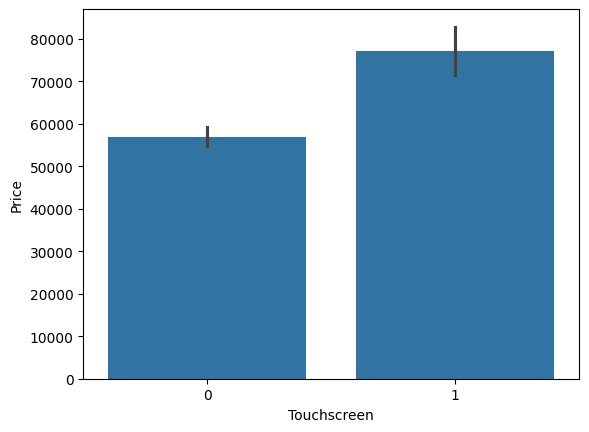

In [20]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [21]:
df['IPS ']=df['ScreenResolution'].apply(lambda X : 1 if "IPS " in X else 0)

In [22]:
# separationg the screen size into x and y

new = df['ScreenResolution'].str.split('x',expand=True)


In [23]:

df['X_res'] =  new[0]
df['Y_res'] = new[1]

In [24]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.2,26586.72,0,0,1366,768
402,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD + 1TB HDD,AMD Radeon RX 550,Windows 10,2.1,60978.96,0,1,IPS Panel Full HD 1920,1080
35,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44,13266.72,0,0,1366,768
457,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252,52693.92,1,0,Touchscreen 2256,1504
1188,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Linux,1.23,58554.72,1,0,Quad HD+ / Touchscreen 3200,1800


In [25]:

df['X_res'] = df['X_res'].str.findall(r'(\d+\.?\d+)').apply(lambda X: X[0])

In [26]:
df['X_res']=df['X_res'].astype('Int32')
df['Y_res']=df['Y_res'].astype('Int32')

In [27]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [28]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [29]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [30]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [31]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [32]:
df['Cpu'] = df['Cpu'].apply(lambda x: " ".join(x.split(" ")[0:3]))

In [33]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [34]:
df['Cpu brand'] = df['Cpu'].apply(fetch_processor)

In [35]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [36]:
df.drop(columns=['Cpu'],inplace=True)

In [37]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [38]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [39]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [40]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [41]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [42]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

In [43]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [44]:
df["second"]= new[1]

In [45]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [46]:
df['first'] = df['first'].str.extract('(\d+)')

In [47]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
719,HP,Notebook,8,256 SSD,Nvidia GeForce 930MX,Windows 10,2.63,63936.0000,0,0,127.335675,Intel Core i7,256,None,0,1,0,0
850,HP,Notebook,4,128 SSD,Intel HD Graphics 400,No OS,1.86,15930.7200,0,0,100.454670,Other Intel Processor,128,None,0,1,0,0
200,Dell,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,98301.6000,0,1,282.423996,Intel Core i7,512,1000 HDD,0,1,0,0
338,Asus,Notebook,4,1000 HDD,Intel HD Graphics 500,Linux,2.0,14651.4672,0,0,100.454670,Other Intel Processor,1000,None,1,0,0,0
740,Dell,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce 940MX,Windows 10,2.0,64308.9600,0,0,141.211998,Intel Core i7,128,1000 HDD,0,1,0,0


In [48]:
df["second"].fillna("0", inplace = True)


C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_17060\319438408.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [49]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
127,Asus,Notebook,4,64 SSD,AMD Radeon R2,Windows 10 S,1.65,14811.3072,0,0,111.935204,AMD Processor,64,0,0,1,0,0
1241,Asus,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.45,68198.4000,0,0,165.632118,Intel Core i7,256,0,0,1,0,0
475,Dell,Notebook,8,128 SSD,Intel HD Graphics 520,Windows 10,1.79,39427.2000,0,0,111.935204,Intel Core i3,128,0,0,1,0,0
1283,Asus,Notebook,4,500 HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496,0,0,100.454670,Intel Core i7,500,0,1,0,0,0
937,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,63882.7200,0,0,141.211998,Intel Core i7,128,1000 HDD,0,1,0,0


In [50]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.extract('(\d+)')

In [51]:
df[df['second'] == '128 SSD']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage


In [52]:
df[df['second'] == '1000 HDD']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage


In [53]:
df["first"] = df["first"].astype("Int32")
df["second"] = df["second"].astype("Int32")

In [54]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,first,second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
197,HP,Notebook,8,512 SSD,Intel UHD Graphics 620,Windows 10,1.49,51095.5200,0,0,...,512,0,0,1,0,0,0,0,0,0
661,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 500,Windows 10,2.2,22324.3200,0,0,...,500,0,1,0,0,0,0,0,0,0
1293,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.6,47898.7200,0,1,...,1000,0,1,0,0,0,0,0,0,0
1034,HP,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.84,65480.5872,0,0,...,256,0,0,1,0,0,0,0,0,0
1277,Acer,Notebook,4,500 HDD,Intel HD Graphics 400,Linux,2.4,15397.9200,0,0,...,500,0,1,0,0,0,0,0,0,0


In [55]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [56]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1035,HP,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.26,71874.7200,0,0,176.232574,Intel Core i7,0,256,0,0
1032,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.7,63499.1040,0,0,127.335675,Intel Core i7,1000,128,0,0
522,Dell,Notebook,8,Intel HD Graphics 620,Windows 10,1.64,68184.0144,0,0,157.350512,Intel Core i5,0,256,0,0
672,Lenovo,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,1.3,55091.5200,1,1,165.632118,Intel Core i5,0,256,0,0
389,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 620,Windows 10,1.42,133679.5200,1,0,209.800683,Intel Core i7,0,512,0,0


In [59]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [60]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [61]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [62]:
df = df[df['Gpu brand'] != "ARM"]

In [98]:
df.head()

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [63]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [64]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [65]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [66]:
df['os'] = df['OpSys'].apply(cat_os)

In [67]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Tafique Hossain Khan\AppData\Local\Temp\ipykernel_17060\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


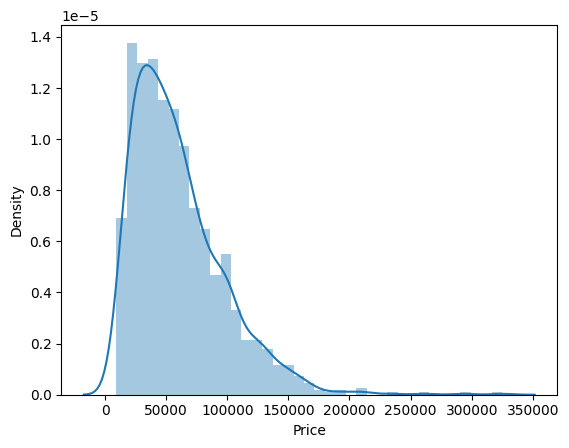

In [68]:
sns.distplot(df['Price'])
plt.show()

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,Intel HD Graphics 620,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,AMD Radeon Pro 455,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [70]:
#df.to_csv("cleaned_laptop_data.csv")

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [77]:
X = df.drop(columns=['Price'])
y = pd.DataFrame(np.log(df['Price']))

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [95]:
X_train['Ram'].value_counts()

Ram
8     532
4     310
16    171
6      35
12     21
2      17
32     16
24      3
64      1
Name: count, dtype: Int64

In [96]:
X_train

,Company,TypeName,Ram,Gpu,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,Intel HD Graphics 620,2.0,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,Nvidia GeForce GTX 1050,2.4,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,Intel HD Graphics 400,1.2,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,Intel HD Graphics 520,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,Nvidia GeForce 940MX,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,Nvidia GeForce GTX 940MX,2.2,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,Nvidia GeForce 940MX,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,AMD Radeon RX 540,2.2,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,Nvidia GeForce 920MX,2.2,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,3,8,11,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    #('step2',step2)
])

X_train_encoded = step1.fit_transform(X_train)
X_test_encoded = step1.transform(X_test)

step2.fit(X_train_encoded)

y_pred = pipe.predict(X_test_encoded)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

ValueError: Found unknown categories ['AMD R4 Graphics', 'AMD Radeon R7 M365X', 'AMD Radeon R5 M315', 'AMD Radeon R3', 'Nvidia GeForce GTX1050 Ti', 'Nvidia GeForce 940M', 'Intel Iris Graphics 550'] in column 2 during transform